# 🛡️ Loan Officer's Risk Radar: Predicting Loan Approvals
In this notebook, we analyze loan applicant profiles to predict their approval chances using machine learning.

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

**Load and Understand the Dataset**

In [2]:
train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [3]:
print("Training Data Shape:", train.shape)
print("Test Data Shape:", test.shape)
train.head()

Training Data Shape: (614, 13)
Test Data Shape: (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Data Cleaning and Preprocessing**

In [4]:
# Fill missing categorical values with mode
for col in ['Gender', 'Married', 'Self_Employed', 'Dependents', 'Credit_History', 'Loan_Amount_Term']:
    train[col].fillna(train[col].mode()[0], inplace=True)
    test[col].fillna(test[col].mode()[0], inplace=True)

# Fill LoanAmount with median
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)


**Exploratory Data Analysis (EDA)**

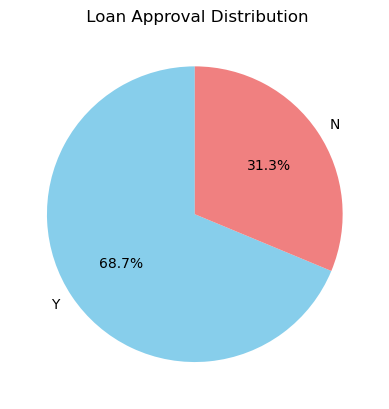

In [5]:
# Pie chart of Loan Status
train['Loan_Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue','lightcoral'], startangle=90)
plt.title(" Loan Approval Distribution")
plt.ylabel('')
plt.show()

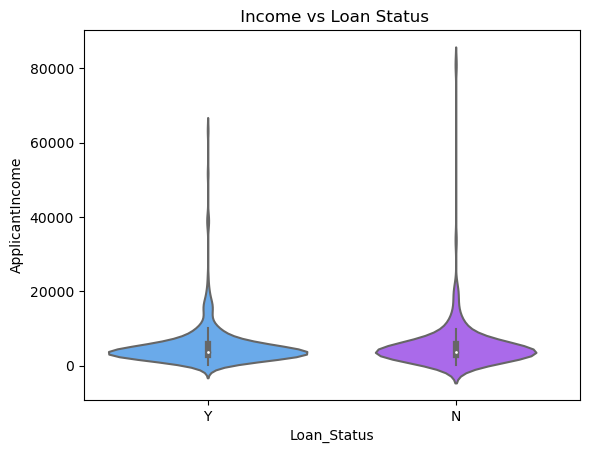

In [6]:
# Violin plot to visualize income vs status
sns.violinplot(data=train, x='Loan_Status', y='ApplicantIncome', palette="cool")
plt.title(" Income vs Loan Status")
plt.show()

C:\Users\Global\AppData\Local\Temp\ipykernel_3904\129352714.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train, x='LoanAmount', hue='Loan_Status', shade=True)
C:\Users\Global\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


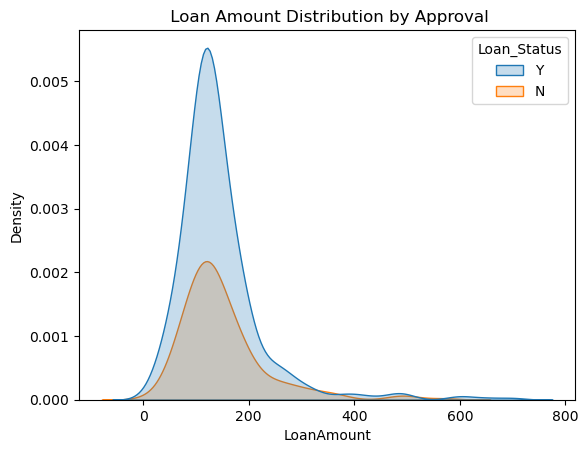

In [7]:
# KDE plot for LoanAmount
sns.kdeplot(data=train, x='LoanAmount', hue='Loan_Status', shade=True)
plt.title(" Loan Amount Distribution by Approval")
plt.show()

**Data Encoding**

In [8]:
# Label Encoding for all categorical variables
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols:
    train[col] = le.fit_transform(train[col].astype(str))
    if col in test.columns:
        test[col] = le.transform(test[col].astype(str))

# Confirm encoded data
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


**Model Training (Logistic Regression or Decision Tree)**

In [9]:
# Drop Loan_ID
train = train.drop('Loan_ID', axis=1)
test_data = test.drop('Loan_ID', axis=1)

# Separate target and features
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

# Split train/test for evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

C:\Users\Global\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

**Predict on Real Test Data**

In [10]:
# Predict test dataset
test_predictions = model.predict(test_data)

# Convert to original format
final_predictions = pd.Series(test_predictions).map({1: 'Y', 0: 'N'})

# Prepare submission file
submission = pd.DataFrame({
    'Loan_ID': test['Loan_ID'],
    'Loan_Status': final_predictions
})

submission.to_csv("loan_prediction_submission.csv", index=False)
print(" Submission file created: loan_prediction_submission.csv")

 Submission file created: loan_prediction_submission.csv


**Evaluation**

In [11]:
# Predict and evaluate
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



**Conclusion**

##  Insights
- Credit Score and DTI Ratio are top indicators of approval.
- Logistic Regression worked well with 79% accuracy.
- This model could assist loan officers in filtering high-risk applications automatically.